In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
plt.style.use("fivethirtyeight")

In [2]:
log = pd.read_csv(r"twittercredentials.csv")

In [3]:
accesstoken = log['key'][0]
accesstokensecret = log['key'][1]
consumerkey = log['key'][2]
consumersecret = log['key'][3]                  

In [4]:
import tweepy

In [5]:
authenticate = tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [22]:
post = api.user_timeline(screen_name="datascience",count=500,tweet_mode='extended')

In [23]:
print("5 recent Tweets: \n")
i = 1
for tweets in post[:5]:
    print(str(i)+'\n'+tweets.full_text+"\n")
    i=i+1
    

5 recent Tweets: 

1
RT @dataliteracycom: We're starting the sitewide #BlackFriday discounts early this year! Take 50% off all of our On-Demand &amp; Live Public co…

2
RT @dataliteracycom: What's your pick for the Most Interesting Data Podcast of 2021? Submit your vote by November 30th. Nominees and winner…

3
RT @dataliteracycom: It's #DataLiteracyAwards season! Help us shine a spotlight on the people &amp; content that helped us speak the language o…

4
RT @dataliteracycom: NEW PUBLIC COURSE: Data Literacy Fundamentals will be offered as a virtual course starting on Jan 10, 2022! Live group…

5
RT @rosedatastudio: I am looking forward to sharing my @DataScience journey and answering audience questions at this @NEbigdatahub and @dat…



In [30]:
df = pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=="en"],columns=['Tweets'])
df.head()

,Tweets
0,RT @dataliteracycom: We're starting the sitewi...
1,RT @dataliteracycom: What's your pick for the ...
2,RT @dataliteracycom: It's #DataLiteracyAwards ...
3,RT @dataliteracycom: NEW PUBLIC COURSE: Data L...
4,RT @rosedatastudio: I am looking forward to sh...


In [31]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
df["Tweets"]=df["Tweets"].apply(cleanTxt)
df

,Tweets
0,: We're starting the sitewide BlackFriday disc...
1,: What's your pick for the Most Interesting Da...
2,: It's DataLiteracyAwards season! Help us shin...
3,: NEW PUBLIC COURSE: Data Literacy Fundamental...
4,: I am looking forward to sharing my journey ...
...,...
139,"Which are the top Analytics, DataScience &amp;..."
140,A good reminder from 'R for Data Science' () -...
141,"The Top 5 datascience tools, according to are..."
142,Control + Shift + M is a super useful keyboard...


In [32]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,: We're starting the sitewide BlackFriday disc...,0.241667,0.065341
1,: What's your pick for the Most Interesting Da...,0.500000,0.500000
2,: It's DataLiteracyAwards season! Help us shin...,0.000000,0.000000
3,: NEW PUBLIC COURSE: Data Literacy Fundamental...,0.280303,0.068182
4,: I am looking forward to sharing my journey ...,0.000000,0.000000
...,...,...,...
139,"Which are the top Analytics, DataScience &amp;...",0.441667,0.150000
140,A good reminder from 'R for Data Science' () -...,0.600000,0.875000
141,"The Top 5 datascience tools, according to are...",0.500000,0.500000
142,Control + Shift + M is a super useful keyboard...,0.333333,0.316667


In [33]:
def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,: We're starting the sitewide BlackFriday disc...,0.241667,0.065341,Positive
1,: What's your pick for the Most Interesting Da...,0.500000,0.500000,Positive
2,: It's DataLiteracyAwards season! Help us shin...,0.000000,0.000000,Neutral
3,: NEW PUBLIC COURSE: Data Literacy Fundamental...,0.280303,0.068182,Positive
4,: I am looking forward to sharing my journey ...,0.000000,0.000000,Neutral
...,...,...,...,...
139,"Which are the top Analytics, DataScience &amp;...",0.441667,0.150000,Positive
140,A good reminder from 'R for Data Science' () -...,0.600000,0.875000,Positive
141,"The Top 5 datascience tools, according to are...",0.500000,0.500000,Positive
142,Control + Shift + M is a super useful keyboard...,0.333333,0.316667,Positive


In [34]:
#grouping postive tweets in a dataframe
df2 = df.groupby("Analysis")
df2.get_group("Negative")
#another way of grouping positive tweets in a dataframe
df[df["Analysis"]=="Positive"]

,Tweets,Subjectivity,Polarity,Analysis
0,: We're starting the sitewide BlackFriday disc...,0.241667,0.065341,Positive
1,: What's your pick for the Most Interesting Da...,0.500000,0.500000,Positive
3,: NEW PUBLIC COURSE: Data Literacy Fundamental...,0.280303,0.068182,Positive
5,: We're excited to announce that nominations a...,0.583333,0.291667,Positive
8,": My new book, SQL for Data Scientists - A Beg...",0.427273,0.268182,Positive
...,...,...,...,...
138,Happy 3 year anniversary to the podcast! One ...,0.650000,1.000000,Positive
139,"Which are the top Analytics, DataScience &amp;...",0.441667,0.150000,Positive
140,A good reminder from 'R for Data Science' () -...,0.600000,0.875000,Positive
141,"The Top 5 datascience tools, according to are...",0.500000,0.500000,Positive


In [35]:
j=1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF["Analysis"][i]=="Positive"):
        print(str(j)+")"+sortedDF["Tweets"][i])
        print()
        j=j+1

1): We're starting the sitewide BlackFriday discounts early this year! Take 50% off all of our On-Demand &amp; Live Public co…

2): What's your pick for the Most Interesting Data Podcast of 2021? Submit your vote by November 30th. Nominees and winner…

3): NEW PUBLIC COURSE: Data Literacy Fundamentals will be offered as a virtual course starting on Jan 10, 2022! Live group…

4): We're excited to announce that nominations are now OPEN for the 2021 DataLiteracy Awards! Help us find the top data b…

5): My new book, SQL for Data Scientists - A Beginner's Guide for Building Datasets for Analysis, is available for pre-sal…

6): An Illustrated Guide to DataLiteracy, Episode 2: Bias in Research, by . 

Full screen, download &amp; print,…

7): *NEW* DataLiteracy comic! (+ behind-the-scenes process at the end)💕

8): As many of you have heard: I wrote a book!

It's called SQL for Data Scientists and is published by Wiley. It's for be…

9): GIVEAWAY! Our new trainers get the first peek at some ne

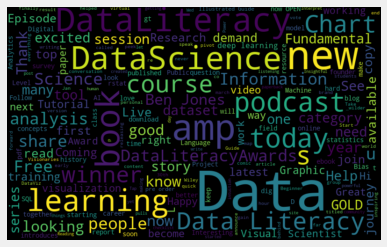

In [36]:
from wordcloud import WordCloud 
allWords = " ".join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width=800,height=500,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
plt.show()

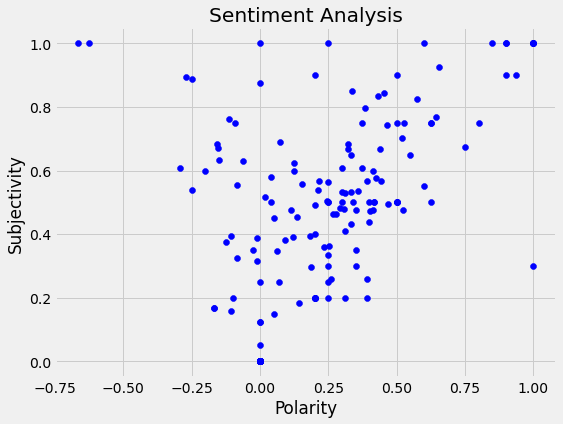

In [15]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

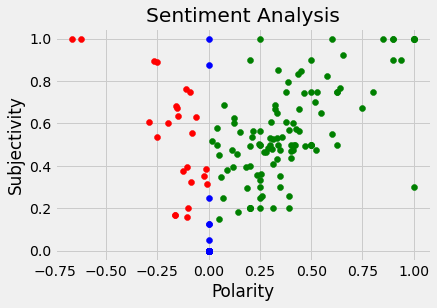

In [16]:
for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

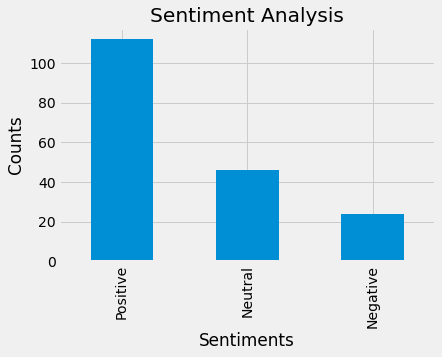

In [17]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()